In [181]:
import os, sys
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')
import seaborn as sns
from maroc_data_new_tboard import MarocData
from functools import partial
from scipy.stats import norm
from operator import add
from functools import reduce 
import operator
import json
input_dat1 = '../readmaroc/data/farm/Run000109218.dat'
input_dat2 = '../readmaroc/data/farm/Run000133072.dat'
marocdata1 = MarocData(input_dat1)
marocdata2 = MarocData(input_dat2)

In [182]:
#sns.set_theme(style="whitegrid", palette="pastel")

In [183]:
marocdata = marocdata1

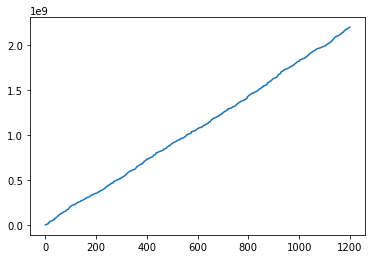

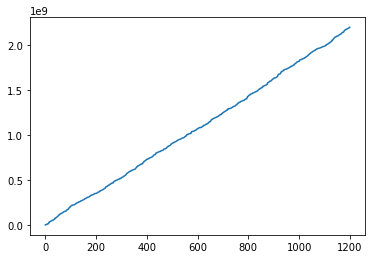

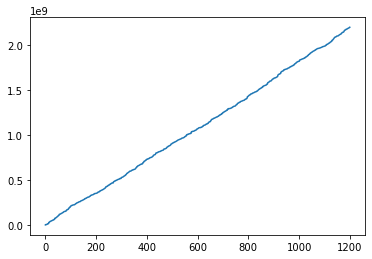

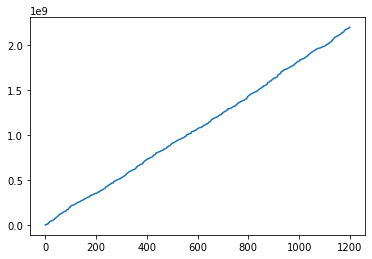

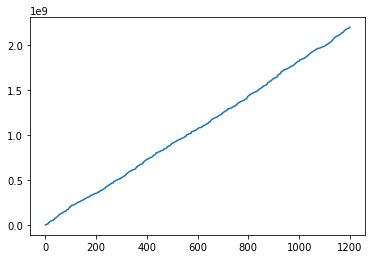

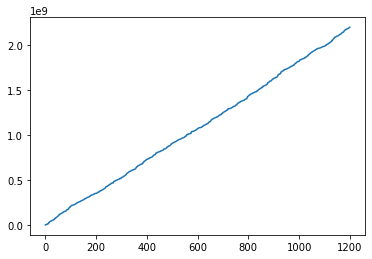

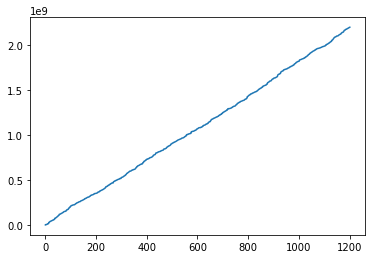

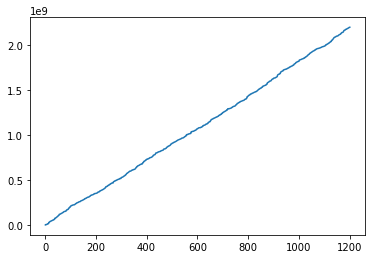

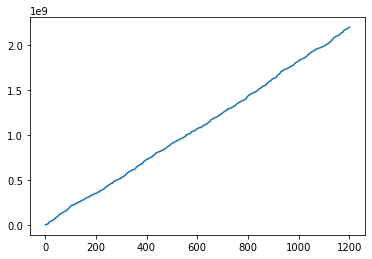

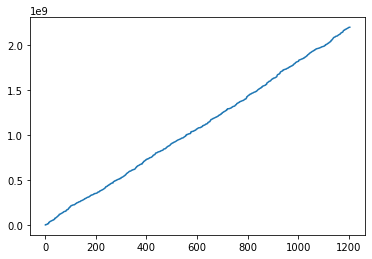

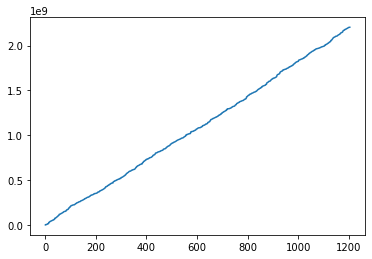

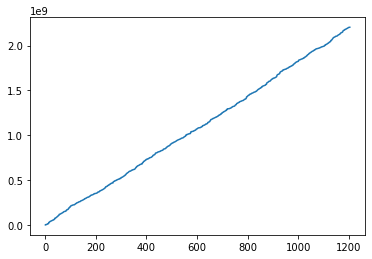

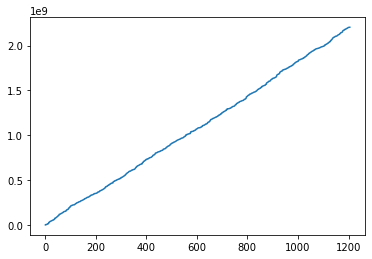

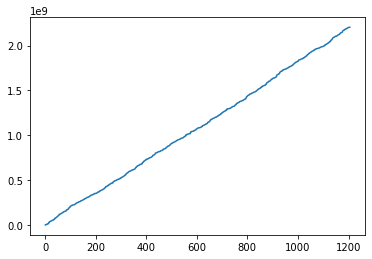

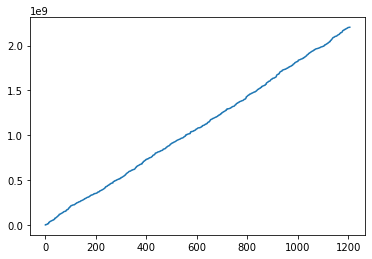

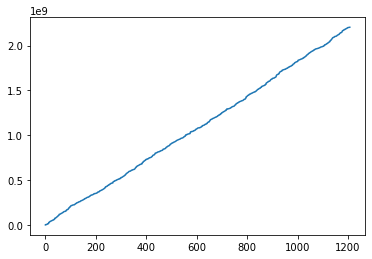

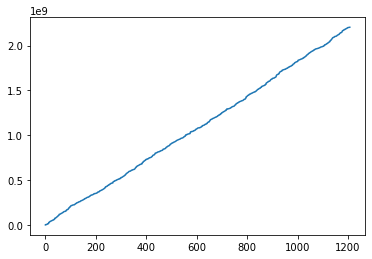

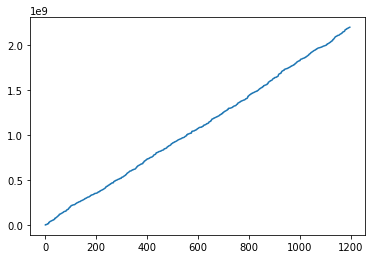

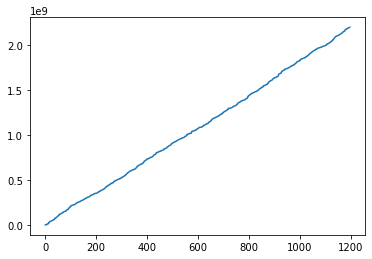

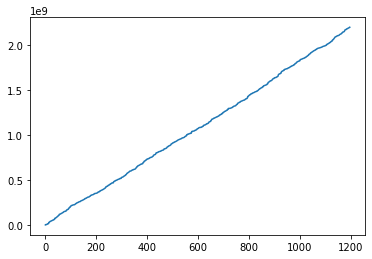

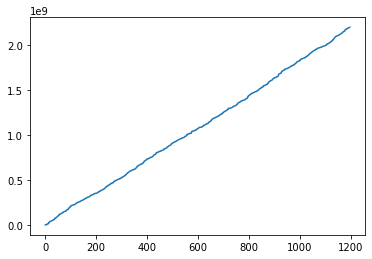

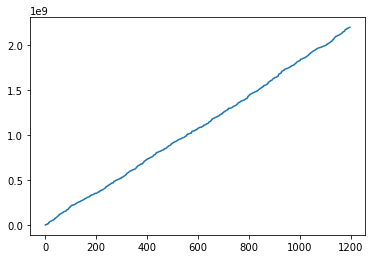

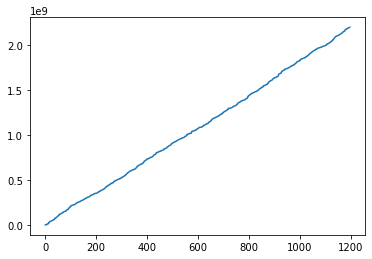

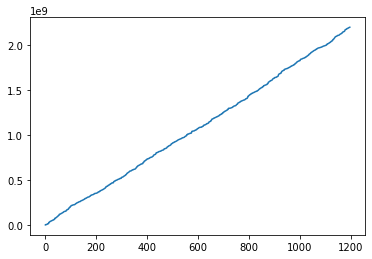

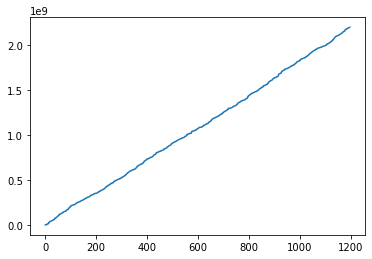

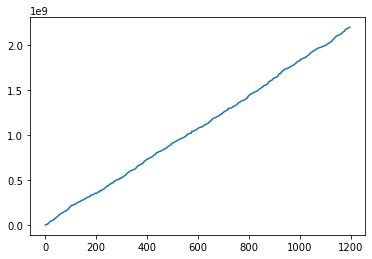

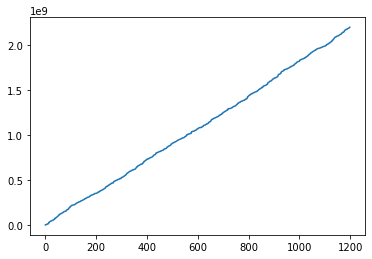

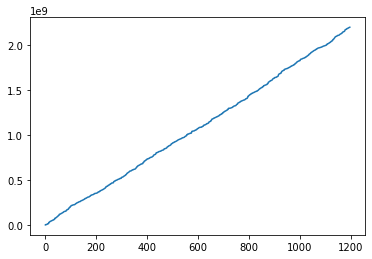

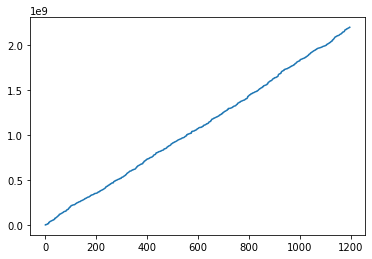

In [184]:
for board in marocdata.active_boards:
    plt.plot(marocdata.get_board(board).timestamps.keys(), marocdata.get_board(board).timestamps.values())
    plt.show()

In [185]:
marocdata.fix_p1(debug=False)

In [186]:
def take_consecutive(index_list):
    if len(index_list)<3:
        return None
    else:
        consecutive = []
        index_list = np.sort(index_list)
        for el, elp1 in zip(index_list, index_list[1:]):
            if elp1==el+1:
                consecutive.append(el)
                consecutive.append(elp1)
        if len(consecutive)==0:
            return None
        else:
            return np.unique(consecutive)

In [187]:
def over_threshold_per_board(marocdata, pedestals, noise):
    ts_over_threshold_per_board = {}
    positions = {}
    for bid in marocdata.active_boards:
        timestamps = []
        board = marocdata.get_board(bid)
        for eid, signal in board.signals.items():
            if np.any((signal - pedestals[bid]) > noise[bid]):
                over = np.sort(np.where((signal - pedestals[bid]) > noise[bid])[0])
                consecutives = take_consecutive(over)
                
                if consecutives is None:
                    pass
                else:
                    if len(consecutives)<=30:
                        print(bid,consecutives)
                        event = board.get_event(eid)
                        #print(bid, eid, consecutives)
                        timestamps.append(event.TS_norm)
        positions[bid]= consecutives
        ts_over_threshold_per_board[bid] = timestamps
    return ts_over_threshold_per_board, positions

In [188]:
pedestals = marocdata.pedestals_tot
noise = marocdata.noise_tot(4)

In [189]:
ts_over_threshold, pos = over_threshold_per_board(marocdata, pedestals, noise)

all_ts = reduce(add, ts_over_threshold.values())

ts_to_plot = [ts for ts, occ in Counter(all_ts).items() if occ >= 2]

2 [66 67 68]
2 [0 1 2]
4 [249 250 251 252 253 254 255]
4 [214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229]
4 [212 213 214 215 216 217 218 219 220 221]
4 [128 129 130 131 154 155 156 157 158 159 160 161 162 163 164 165]
4 [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
4 [217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232]
4 [ 89  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106 108
 109 110 112 113 114 115 116 117 118 119]
4 [69 70 71 72 73 74 75 76 77]
4 [170 171 174 175 176 177 178 179 180 181]
4 [201 202 203 204 205 207 208 209]
4 [100 101 102 103 104 105 106 107 108 109 110]
5 [87 88 89 91 92 93 94 95]
5 [71 72 73]
5 [109 110 111 112 113 114 115 116 117 118]
5 [296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311]
5 [145 146 166 167 168]
6 [188 189]
6 [307 308 309 311 312 313 314 315 316 317 318 319]
6 [180 181 183 184 185 186 187 188 189 190 191]
6 [ 64  65  66  67  68  69  70  71  72  73 189 190 191]
6 [ 88  89  90  91  9

In [190]:
print(len(all_ts))

188


In [191]:
pos

{1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: array([ 81,  82,  83, 171, 172, 173, 174, 175]),
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: array([54, 55, 56, 57]),
 14: array([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74, 182, 183,
        184, 185, 186, 188, 189, 190, 191]),
 15: array([  0,   1,   2,   3,   4,   5,   7,   8,  45,  46,  47,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  99, 100, 101, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
        227, 228, 229

In [192]:
xx, yy = zip(*Counter(all_ts).items())

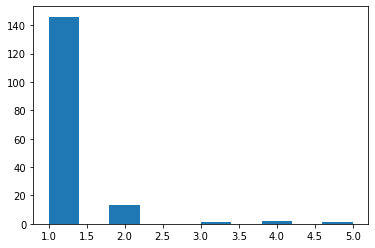

In [193]:
plt.hist(yy, bins=10)
plt.show()

In [194]:
def check_different_selections(marocdata, sigma):
    pedestals = marocdata.pedestals_tot
    noise = marocdata.noise_tot(sigma)
    ts_over_threshold = over_threshold_per_board(marocdata, pedestals, noise)
    all_ts = reduce(add, ts_over_threshold.values())
    xx, yy = zip(*Counter(all_ts).items())
    return yy

1 [145 146]
1 [207 208]
1 [79 80]
1 [167 168]
1 [137 138]
1 [148 149]
1 [  3   4 210 211]
1 [20 21]
1 [87 88]
1 [83 84]
1 [117 118]
1 [94 95]
1 [18 19]
1 [81 82]
1 [3 4]
1 [175 176]
1 [138 139]
1 [133 134]
1 [113 114]
1 [163 164]
1 [92 93]
1 [0 1]
1 [0 1 2]
1 [178 179]
1 [64 65]
1 [74 75]
1 [155 156]
2 [59 60 66 67]
2 [ 79  80 121 122 125 126]
2 [0 1 2 3]
2 [195 196]
2 [283 284]
2 [80 81]
2 [189 190]
2 [166 167]
2 [227 228]
2 [90 91]
2 [0 1 2 3]
2 [80 81]
2 [103 104]
2 [142 143]
2 [0 1 2]
2 [159 160]
2 [64 65 66 67 68 70 71 72]
2 [156 157 200 201]
2 [0 1 2 3]
2 [0 1]
2 [64 65 66]
2 [249 250]
2 [64 65 66]
2 [  0   1   2   3   4 175 176]
2 [0 1]
2 [136 137]
2 [105 106]
2 [0 1]
2 [64 65]
2 [163 164]
2 [107 108]
2 [136 137]
2 [230 231]
2 [67 68]
2 [ 0  1  2  3 30 31 46 47]
2 [227 228]
2 [35 36]
2 [124 125]
2 [133 134]
2 [286 287]
2 [1 2]
2 [12 13]
2 [0 1 2]
2 [145 146]
3 [116 117]
3 [116 117]
3 [150 151]
3 [101 102]
3 [265 266]
3 [301 302 303]
3 [19 20 21]
3 [135 136]
3 [175 176]
3 [166 16

16 [79 80]
16 [112 113 114]
16 [37 38]
16 [20 21]
16 [ 4  5 10 11 12 51 52]
16 [0 1 2 4 5]
16 [0 1 4 5]
16 [67 68]
16 [0 1 3 4 5]
16 [158 159]
16 [113 114]
16 [126 127]
16 [ 0  1  3  4  5 12 13]
16 [108 109]
16 [0 1 2 3 4 5]
16 [0 1 2 3 4]
16 [22 23 24 50 51]
16 [0 1 2 3 4 5]
16 [0 1 2 3 4 5 8 9]
16 [0 1 4 5 8 9]
16 [0 1]
16 [124 125]
16 [0 1]
16 [164 165]
16 [66 67]
16 [0 1 4 5]
16 [86 87]
16 [0 1 2 3 4 6 7 8]
16 [87 88]
17 [84 85]
17 [317 318]
17 [56 57]
17 [266 267]
17 [121 122]
17 [66 67]
17 [317 318]
17 [262 263 264]
17 [266 267]
17 [236 237]
17 [257 258]
17 [221 222]
17 [222 223]
17 [219 220]
17 [310 311]
17 [76 77]
17 [128 129 130 140 141 142 190 191]
17 [33 34]
17 [294 295]
17 [291 292]
17 [229 230]
18 [128 129 130]
18 [111 112]
18 [208 209]
18 [85 86 88 89 90]
18 [146 147]
18 [270 271]
18 [30 31]
18 [149 150]
18 [178 179 229 230]
18 [95 96]
18 [256 257]
18 [0 1]
18 [68 69]
18 [105 106]
18 [111 112]
18 [164 165]
18 [137 138]
18 [13 14]
18 [2 3]
18 [137 138]
18 [280 281]
18 [52 

AttributeError: 'tuple' object has no attribute 'values'

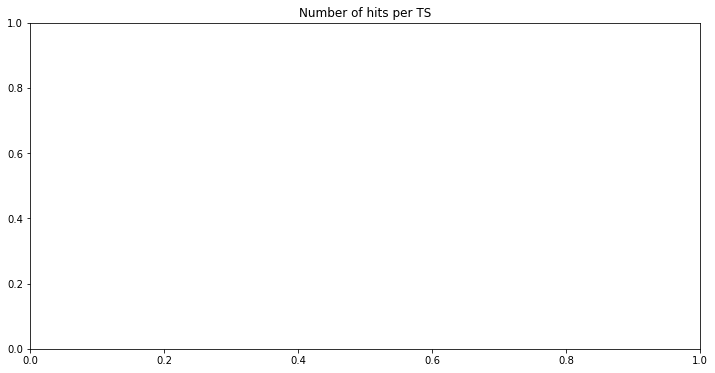

In [195]:
plt.figure(figsize=(12,6))
plt.title('Number of hits per TS')
for s in range(3,8):
    counts = check_different_selections(marocdata,s)
    plt.hist(counts, bins=np.arange(0,21, 1), histtype=u'step', label='{} sigma'.format(s), linewidth=2)
plt.xticks(np.arange(0,21, 2))
plt.legend()
plt.show()

UnboundLocalError: local variable 'consecutives' referenced before assignment

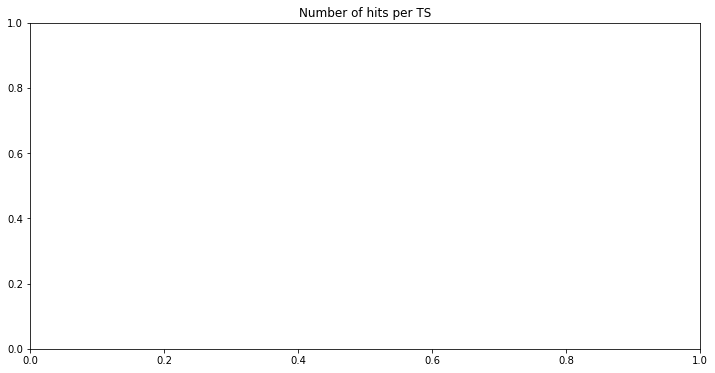

In [196]:
plt.figure(figsize=(12,6))
plt.title('Number of hits per TS')

counts = check_different_selections(marocdata,7)
plt.hist(counts, bins=np.arange(0,21, 1), histtype=u'step', label='{} sigma'.format(s), linewidth=2)
plt.xticks(np.arange(0,21, 2))
plt.legend()
plt.show()